In [3]:
'Dimensionality Reduction with UMAP'

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

!pip install umap-learn
import umap


     ---------------------------------------- 88.2/88.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=ec4c6fd660096c99ea73bf6e5759bdcb63790e28821b575cd2282986a732464e
  Stored in directory: c:\users\luke_\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=134ade2f844ba01089da3cab055f79c346373cca919696dc6f10ef111409bb6d
  Stored in directory: c:\users\luke_\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [4]:
'reading data'

mydata = pd.read_excel(r"./../Data/RawData.xlsx")

In [8]:
'scaling data'

myscaled = StandardScaler().fit(mydata)

mydata_scaled = myscaled.transform(mydata)

mdscaled_array = np.array(mydata_scaled)

print(mdscaled_array)


[[-1.73118283  0.08664536 -0.50970249 ... -0.10066195  0.21032273
   0.        ]
 [-1.72944644  0.08484114 -0.3665744  ... -0.28157158 -0.37472402
   0.        ]
 [-1.72771005  0.08177297  1.01491127 ... -0.25491056 -0.84601891
   0.        ]
 ...
 [ 1.72771005 -2.27822554  4.42876952 ... -7.21537558  6.11931653
   0.        ]
 [ 1.72944644 -2.28305604  5.94482899 ... -7.48439682  6.1003848
   0.        ]
 [ 1.73118283 -2.27776132  3.94805948 ... -7.66535196  5.44054313
   0.        ]]


In [9]:
'doing train test split'

x_trainvalidation, x_test = train_test_split(mdscaled_array, test_size=0.2, random_state=4)
x_train, x_validation = train_test_split(x_trainvalidation, test_size=0.2, random_state=42)


In [10]:
'doing UMAP'

myUMAP = umap.UMAP(n_neighbors=5, random_state=42).fit(x_train)

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

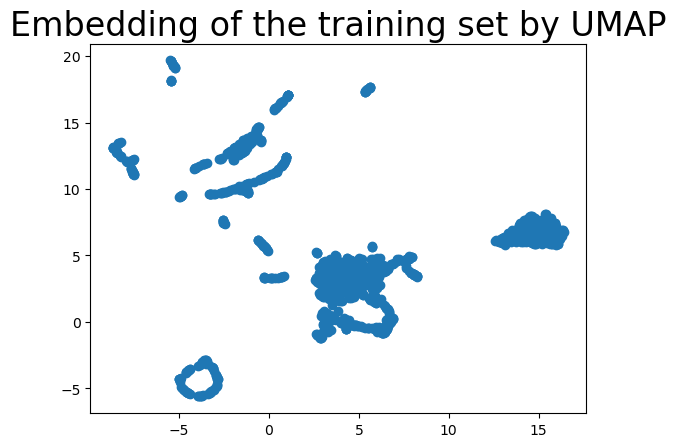

In [14]:
plt.scatter(myUMAP.embedding_[:, 0], myUMAP.embedding_[:, 1])

plt.title('Embedding of the training set by UMAP', fontsize=24)



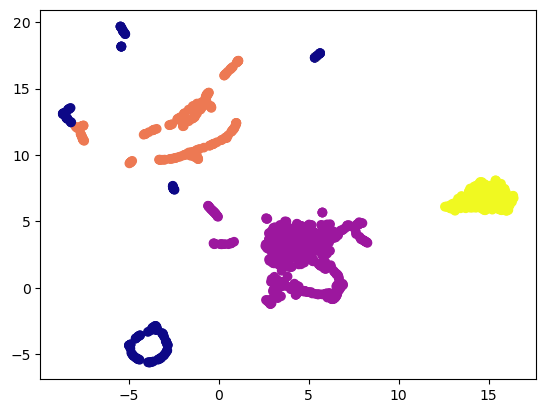

In [29]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import DBSCAN
import numpy as np


mycluster = OPTICS(min_samples = 90).fit(myUMAP.embedding_)
mycluster.labels_

plt.scatter(myUMAP.embedding_[:, 0], myUMAP.embedding_[:, 1], c = mycluster.labels_, cmap = "plasma")

